# Final Project: Video Game Sales

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [2]:
vgsales = pd.read_csv("vgsales.csv")
vgsales.shape

(16598, 11)

In [3]:
vgsales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# Preprocessing Data

In [4]:
#checking for null values
vgsales.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [5]:
vgsales.dropna(inplace=True)

In [6]:
vgsales.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [7]:
vgsales[vgsales['Year'].isin([2017,2018,2019,2020])]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
5957,5959,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.0,0.00,0.02,0.29
14390,14393,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.00,0.0,0.03,0.00,0.03
16241,16244,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0.00,0.0,0.01,0.00,0.01
16438,16441,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0.00,0.0,0.01,0.00,0.01


In [8]:
vgsales.drop(vgsales[vgsales['Year'].isin([2017,2018,2019,2020])].index,inplace=True)

In [9]:
print(vgsales.dtypes)

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object


In [10]:
vgsales.drop("Rank", axis=1, inplace=True)

In [11]:
vgsales.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [12]:
vgsales.drop(vgsales[vgsales.Year < 2010].index, inplace=True)

In [13]:
vgsales.shape

(5130, 10)

# Analysis for Categorical and Numerical variables

Which are the best selling games of all time?

In [14]:
count_platform = vgsales.groupby("Platform")["Name"].count().sort_values(ascending=False)
print(count_platform)

Platform
PS3     886
X360    681
DS      512
PSP     500
3DS     499
PC      456
Wii     452
PSV     408
PS4     335
XOne    213
WiiU    143
PS2      45
Name: Name, dtype: int64


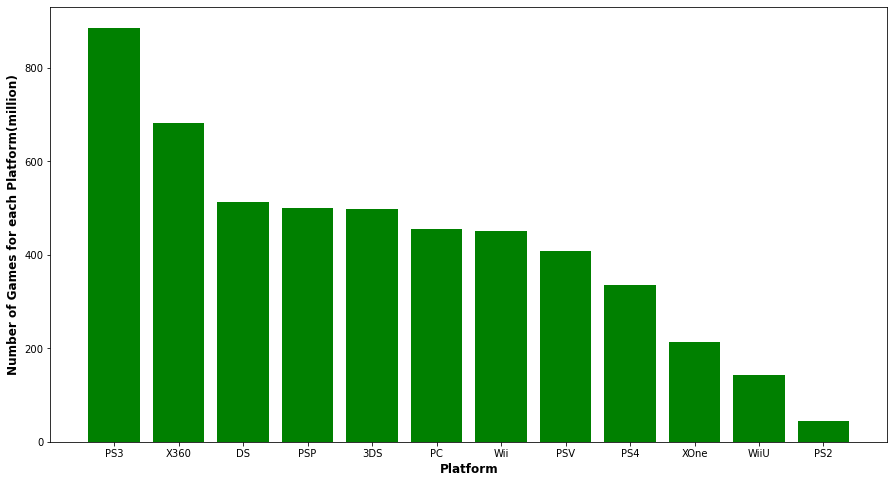

In [17]:
fig, ax = plt.subplots(figsize = (15, 8))
ax.bar(count_platform.index, count_platform, color='g')
ax.set_xlabel('Platform', fontsize=12, fontweight="bold")
ax.set_ylabel('Number of Games for each Platform(million)', fontsize=12, fontweight="bold")
plt.show()

<AxesSubplot:ylabel='Genre'>

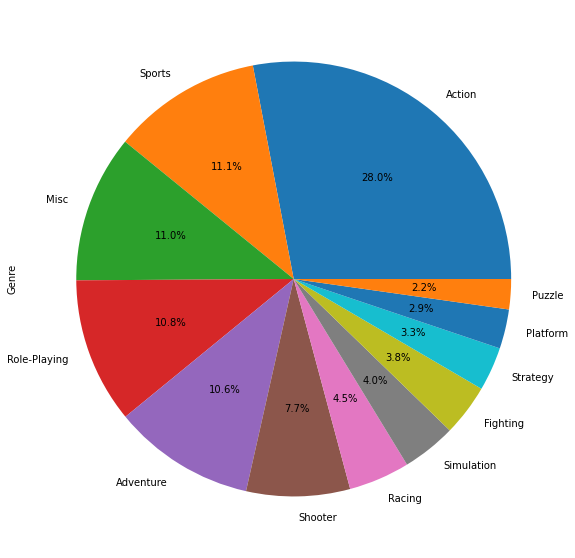

In [18]:
vgsales['Genre'].value_counts().plot.pie(figsize=(20,10),autopct='%1.1f%%')

In [19]:
vgsales.sort_values(by='Global_Sales',ascending=False).head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
15,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
16,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
23,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
26,Pokemon Black/Pokemon White,DS,2010.0,Role-Playing,Nintendo,5.57,3.28,5.65,0.82,15.32
29,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
31,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9.67,3.73,0.11,1.13,14.64
32,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,Nintendo,5.17,4.05,4.34,0.79,14.35
33,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
34,Call of Duty: Black Ops II,PS3,2012.0,Shooter,Activision,4.99,5.88,0.65,2.52,14.03
35,Call of Duty: Black Ops II,X360,2012.0,Shooter,Activision,8.25,4.30,0.07,1.12,13.73


Text(0.5, 1.0, 'Top Selling Games')

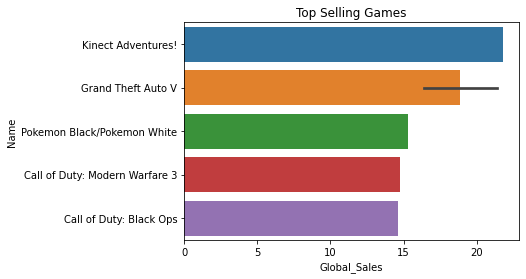

In [20]:
sns.barplot(y=vgsales.Name.head(6), x=vgsales.Global_Sales.head(6));
plt.title("Top Selling Games")

Which are the genres with highest sales?

In [22]:
genre_sales=vgsales.groupby(["Genre"])["Global_Sales"].sum().sort_values(ascending=False)

In [23]:
genre_sales

Genre
Action          673.45
Shooter         462.80
Sports          324.80
Role-Playing    305.67
Misc            238.05
Racing          123.68
Platform        120.67
Fighting         82.08
Simulation       70.86
Adventure        61.03
Strategy         35.74
Puzzle           21.23
Name: Global_Sales, dtype: float64

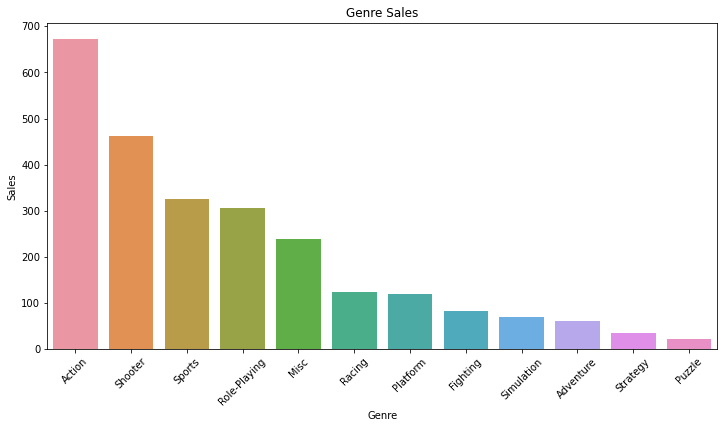

In [24]:
plt.figure(figsize=(12,6))
sns.barplot(x=genre_sales.index,y=genre_sales)
plt.ylabel("Sales")
plt.title("Genre Sales")
plt.xticks(rotation=45);

Which are the Platforms with highest Sales?

In [25]:
Top_platforms=vgsales.groupby(["Platform"])["Global_Sales"].sum().sort_values(ascending=False).head(10)
print(Top_platforms)

Platform
PS3     602.44
X360    556.95
PS4     278.07
3DS     246.27
Wii     232.33
XOne    141.06
DS      129.35
PC      119.78
WiiU     81.86
PSP      64.27
Name: Global_Sales, dtype: float64


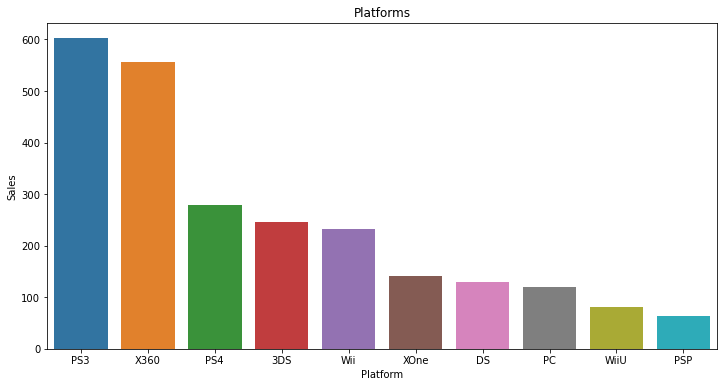

In [26]:
plt.figure(figsize=(12,6))
sns.barplot(x=Top_platforms.index,y=Top_platforms)
plt.ylabel("Sales")
plt.title("Platforms");

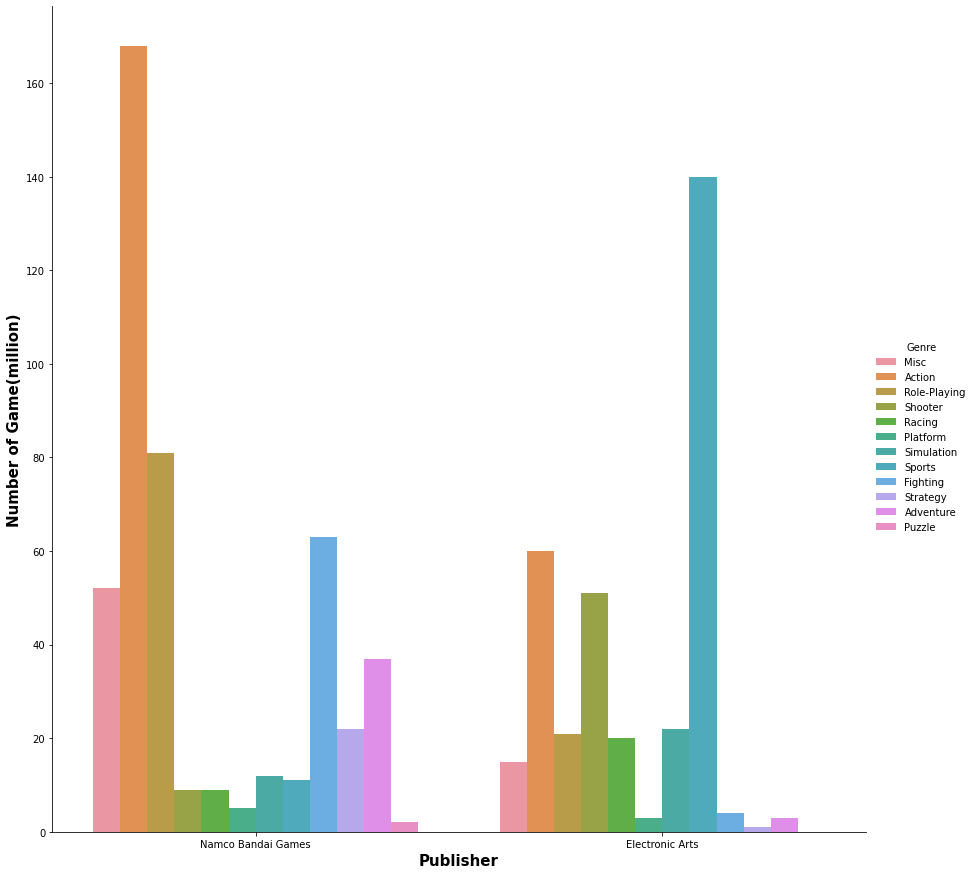

In [52]:
i = sns.catplot(x='Publisher', kind='count',hue='Genre', order=vgsales.Publisher.value_counts().iloc[:2].index, data=vgsales, height=12)
for ax in i.axes:
    i.set_xlabels("Publisher", fontsize=15, fontweight="bold")
    i.set_ylabels("Number of Game(million)", fontsize=15, fontweight="bold")

In [57]:
over_year=vgsales.groupby(['Year'])[['NA_Sales','JP_Sales','EU_Sales','Other_Sales']].sum()

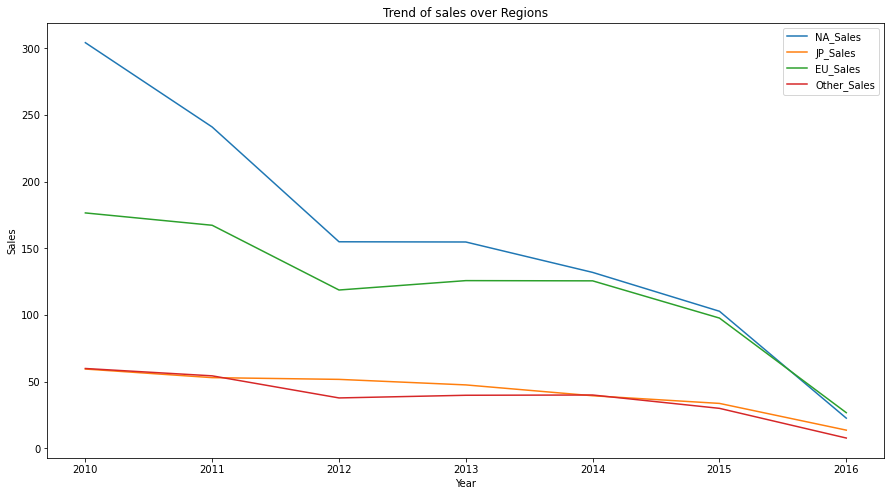

In [59]:
over_year.plot(figsize=(15,8))
plt.title("Trend of sales over Regions")
plt.ylabel("Sales");

Game of the Year (2010-2016)

In [61]:
Top_Games_perY=vgsales[vgsales.groupby("Year")["Global_Sales"].transform(max)==vgsales['Global_Sales']]
Top_Games_perY=Top_Games_perY.set_index('Year').sort_values(by="Year")
Top_Games_perY

,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,,,,,,,,,
2010.0,Kinect Adventures!,X360,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
2011.0,Call of Duty: Modern Warfare 3,X360,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
2012.0,Call of Duty: Black Ops II,PS3,Shooter,Activision,4.99,5.88,0.65,2.52,14.03
2013.0,Grand Theft Auto V,PS3,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
2014.0,Grand Theft Auto V,PS4,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.98
2015.0,Call of Duty: Black Ops 3,PS4,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
2016.0,FIFA 17,PS4,Sports,Electronic Arts,0.28,3.75,0.06,0.69,4.77


<AxesSubplot:ylabel='Publisher'>

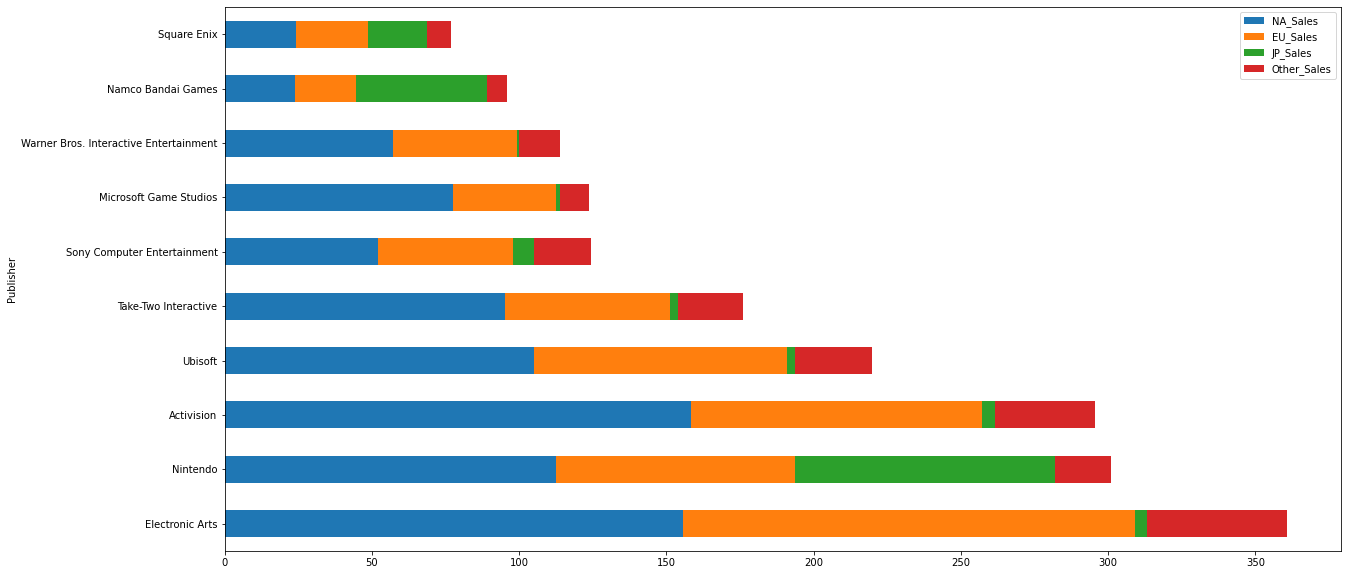

In [67]:
vgsales.groupby(by='Publisher').sum().sort_values(by='Global_Sales',ascending=False).iloc[:10,1:5].plot.barh(stacked=True, 
                                                                                                        figsize=(20,10))